In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

In [2]:
def load(path_train, path_test):
    # Load up the data.
    
    # You probably could have written this easily:
    with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
    with open(path_train, 'r') as f: training = pd.read_csv(f)

    # The number of samples between training and testing can vary
    # But the number of features better remain the same!
    n_features = testing.shape[1]

    X_test  = testing.ix[:,:n_features-1]
    X_train = training.ix[:,:n_features-1]
    y_test  = testing.ix[:,n_features-1:].values.ravel()
    y_train = training.ix[:,n_features-1:].values.ravel()

    if special:# Special:
        X_train=X_train.loc[0:int(np.floor(.04*X_train.shape[0])),:]
        y_train=y_train[0:int(np.ceil(.04*y_train.shape[0]))]
    
    return X_train, X_test, y_train, y_test

In [3]:
special=False

In [4]:
def peekData(X_train):
    # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
    print("Peeking your data...")
    fig = plt.figure()
    fig.set_tight_layout(True)

    cnt = 0
    for col in range(5):
        for row in range(10):
            plt.subplot(5, 10, cnt + 1)
            plt.imshow(X_train.ix[cnt,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis('off')
            cnt += 1
            
    plt.show()

In [5]:
def drawPredictions(X_train, X_test, y_train, y_test):
    fig = plt.figure()
    fig.set_tight_layout(True)
    
    # Make some guesses
    y_guess = model.predict(X_test)

    # INFO: This is the second lab we're demonstrating how to
    # do multi-plots using matplot lab. In the next assignment(s),
    # it'll be your responsibility to use this and assignment #1
    # as tutorials to add in the plotting code yourself!
    num_rows = 10
    num_cols = 5

    index = 0
    for col in range(num_cols):
        for row in range(num_rows):
            plt.subplot(num_cols, num_rows, index + 1)

            # 8x8 is the size of the image, 64 pixels
            plt.imshow(X_test.ix[index,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

            # Green = Guessed right
            # Red = Fail!
            fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
            plt.title('Label: %i' % y_guess[index], fontsize=6, color=fontcolor)
            plt.axis('off')
            index += 1
    plt.show()

In [6]:
test_file='../DAT210x/Module6/Datasets/optdigits.tes'
train_file='../DAT210x/Module6/Datasets/optdigits.tra'

X_train, X_test, y_train, y_test = load(train_file, test_file)

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [7]:
print(X_train.shape)
print(y_train.shape)

print(X_train.loc[0:np.floor(.04*X_train.shape[0]),:].shape)
print(y_train[0:int(np.ceil(.04*y_train.shape[0]))].shape)

(3822, 64)
(3822,)
(153, 64)
(153,)


/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


Peeking your data...


/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


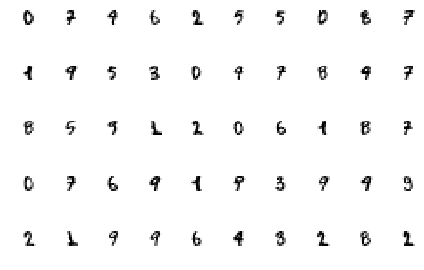

In [8]:
peekData(X_train)

In [9]:
C=1
kernel='linear'
gamma=.001

In [10]:
print("Training SVC Classifier...")
model=svm.SVC(C=C, kernel=kernel, gamma=gamma)
model.fit(X_train, y_train)

Training SVC Classifier...


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
print("Scoring SVC Classifier...")
score=model.score(X_test, y_test)
print(score)

Scoring SVC Classifier...
0.9610244988864143


/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


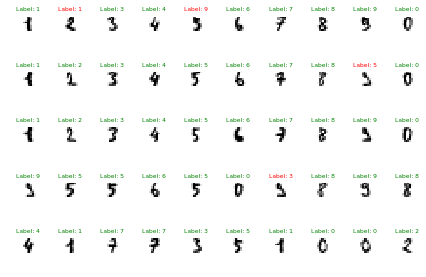

In [12]:
drawPredictions(X_train, X_test, y_train, y_test)

In [13]:
true_1000th_test_value=y_test[1000]
print("1000th test label: ", true_1000th_test_value)

1000th test label:  4


In [14]:
X_test_1000=X_test.loc[1000,:].reshape(1,-1)
y_test_1000=np.array([y_test[1000]])
# print("1000th test prediction: ", guess_1000th_test_value)

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [15]:
y_test_1000

array([4])

In [16]:
score_1000=model.score(X_test_1000, y_test_1000)
print(score_1000)

1.0


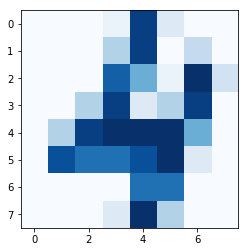

In [17]:
plt.imshow(X_test_1000.reshape(8,8), cmap=plt.cm.Blues, interpolation='nearest')